# (Inefficient) convex optimization with gradient descent

Find the $x$ which minimizes $f(x)$.

$f(x) = (x-3)^2+10$

In [1]:
import numpy as np

def f(x):
    return (x-3)**2+10

x = []
y = []
for x_i in np.arange(-5,11,.1):
    x.append(x_i)
    y.append(f(x_i))

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'DejaVu Sans',
        'size'   : 16}

matplotlib.rc('font', **font)

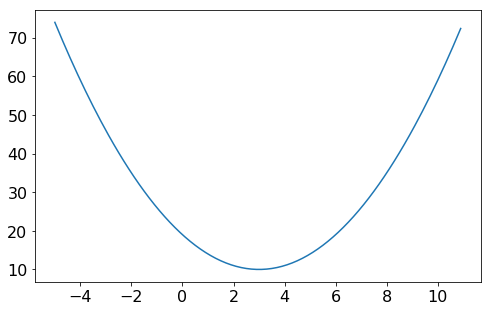

In [303]:
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.show()

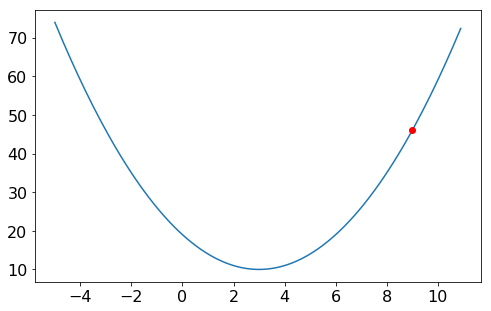

In [3]:
plt.figure(figsize=(8,5))
plt.plot(x,y)
arb_x = 9
f_arb_x = f(arb_x)
plt.plot(arb_x, f_arb_x, 'ro')
plt.show()

$f(x) = (x-3)^2+10$

$\frac{df}{dx} = 2(x-3)$

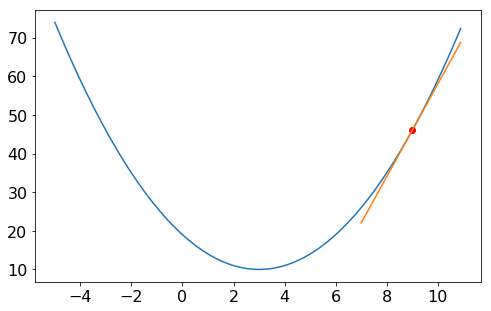

In [4]:
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.plot(arb_x, f_arb_x, 'ro')

def df(x):
    return 2*(x-3)

slope_at_arb_x = df(arb_x)

tan_x = np.arange(arb_x-2,arb_x+2,.1)
tanline_x = slope_at_arb_x*(tan_x-arb_x)+f_arb_x
plt.plot(tan_x, tanline_x)

plt.show()

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def df(x):
    return 2*(x-3)

def pltTan(arb_x):
    plt.figure(figsize=(8,5))
    plt.xlim(-5,10)
    plt.ylim(0,70)
    plt.plot(x,y)
    slope_at_arb_x = df(arb_x)
    tan_x = np.arange(arb_x-3,arb_x+3,.1)
    f_arb_x = f(arb_x)
    plt.plot(arb_x, f_arb_x, 'ro')
    tanline_x = slope_at_arb_x*(tan_x-arb_x)+f_arb_x
    plt.plot(tan_x, tanline_x)
    plt.text(6, 5, "df({:.2f})={:.2f}".format(arb_x,slope_at_arb_x), fontsize=12)
    plt.show()
    
interact(pltTan, arb_x=(-4,10,.25))

A Jupyter Widget

<function __main__.pltTan>

Gradient descent finds local minima by moving a guess in the direction of the gradient.

$x_{t+1} = x_t - \alpha \frac{df}{dx} \vert_{x_t}$

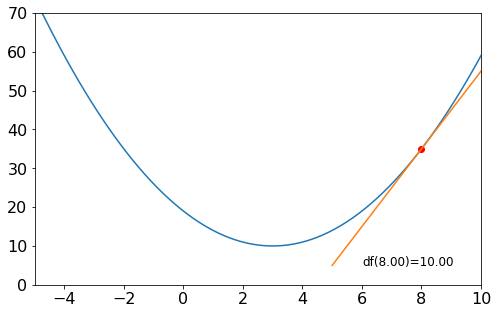

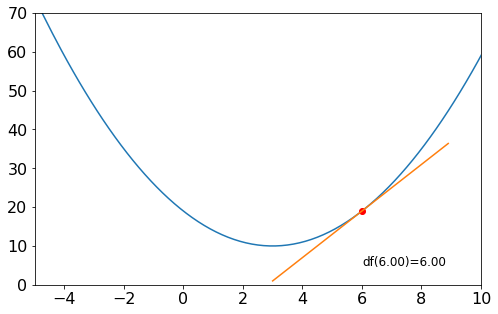

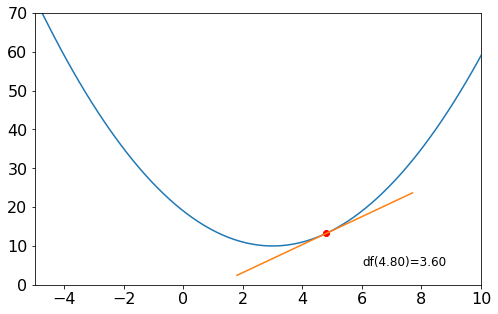

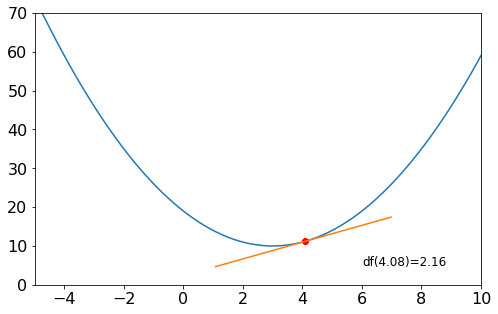

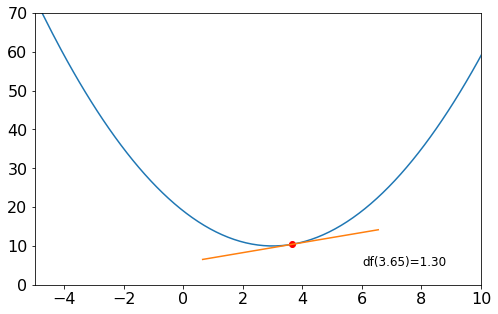

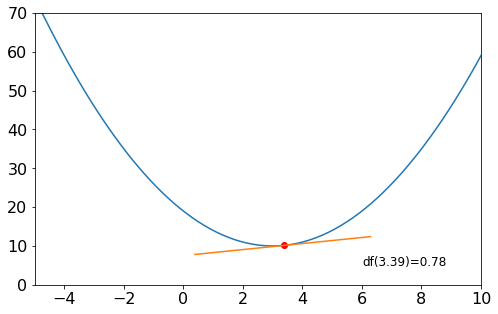

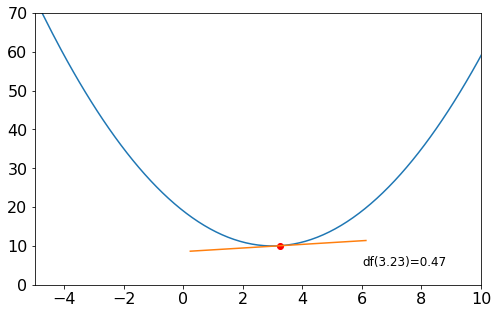

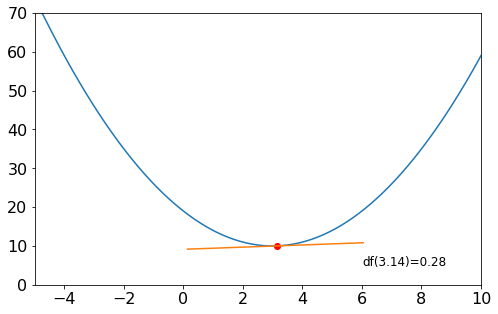

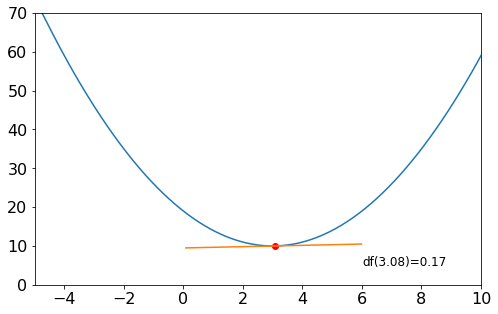

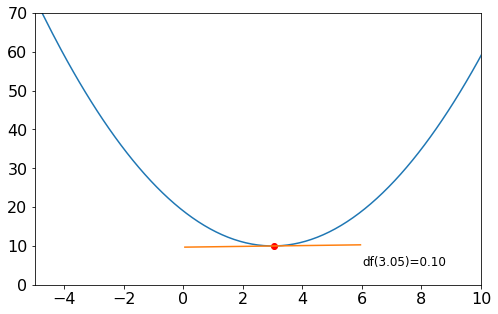

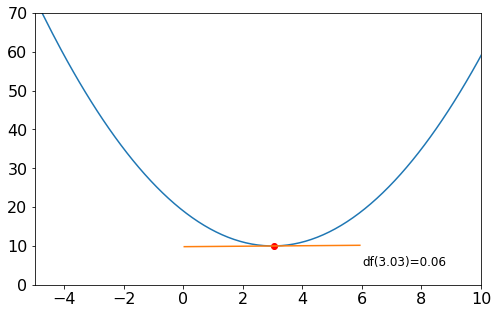

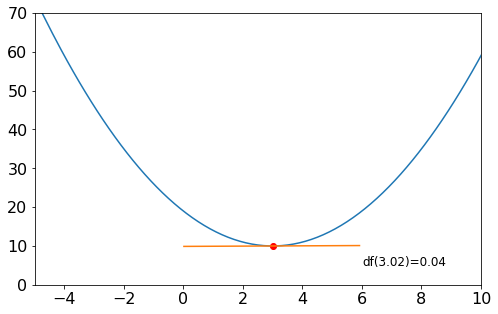

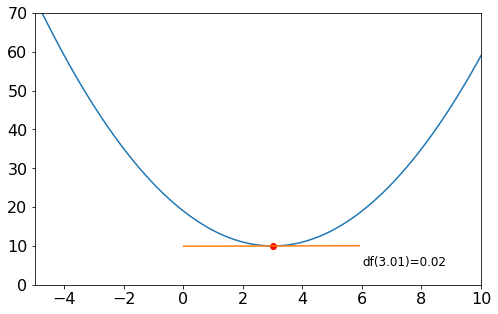

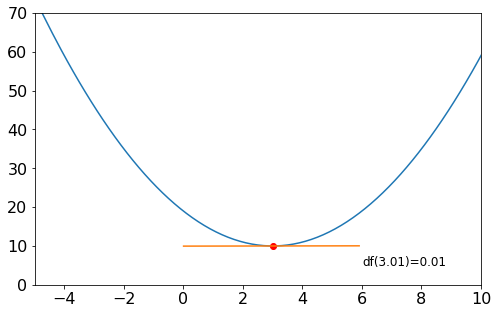

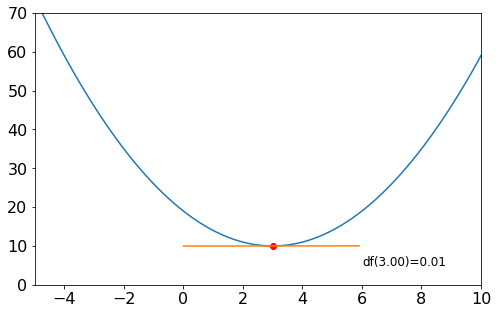

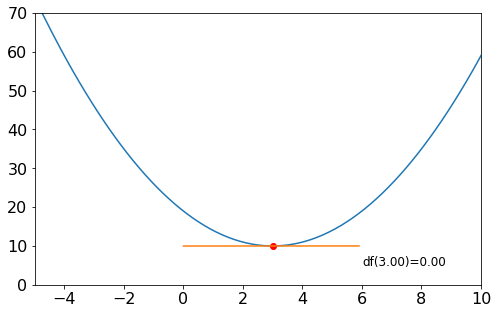

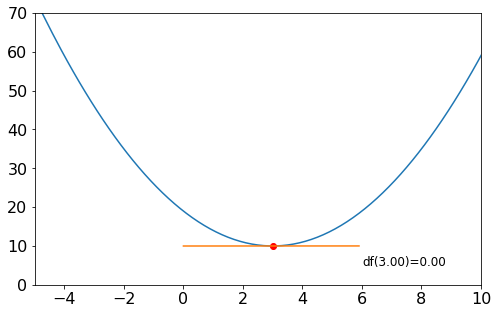

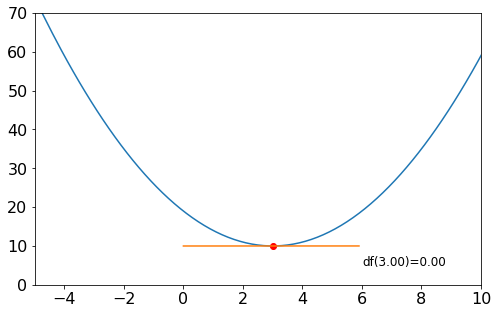

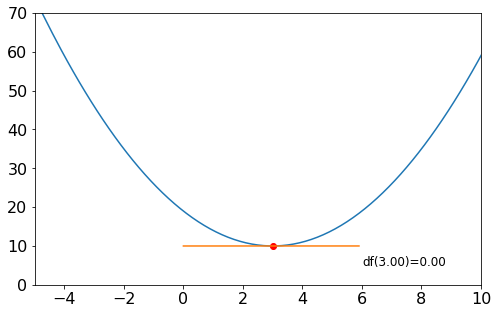

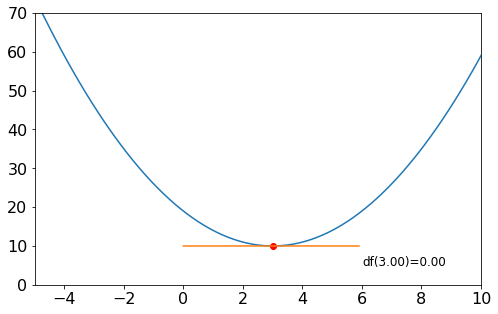

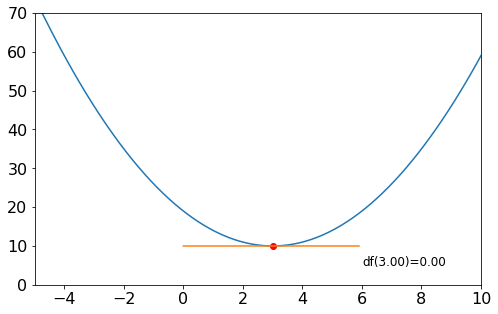

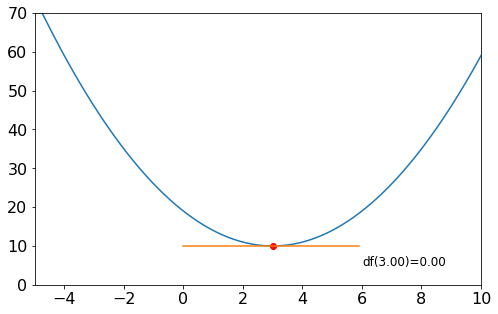

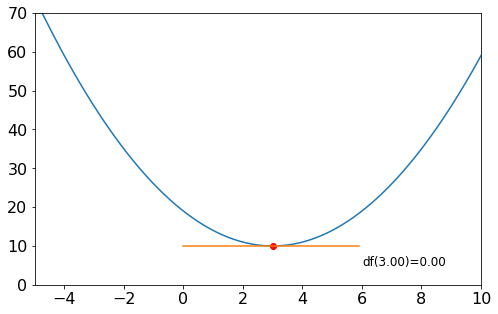

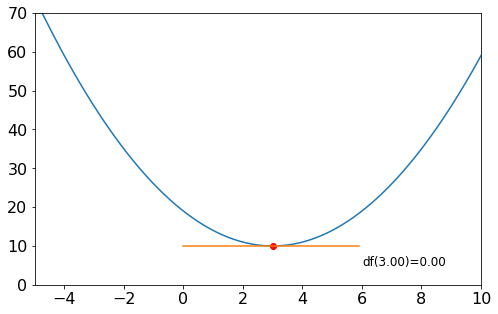

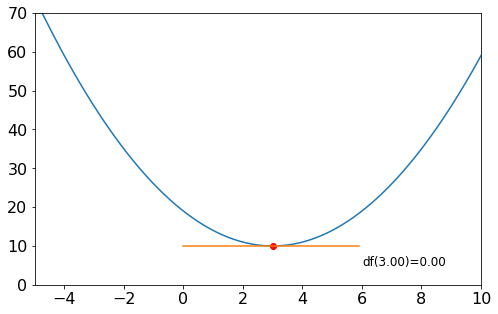

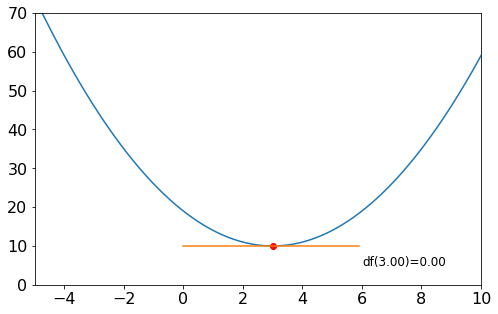

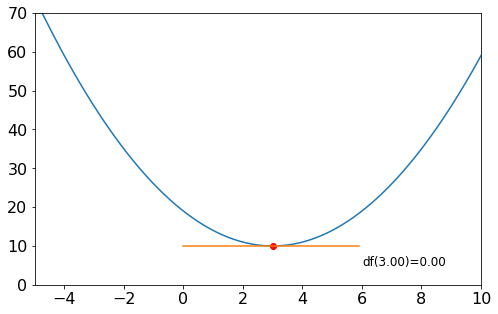

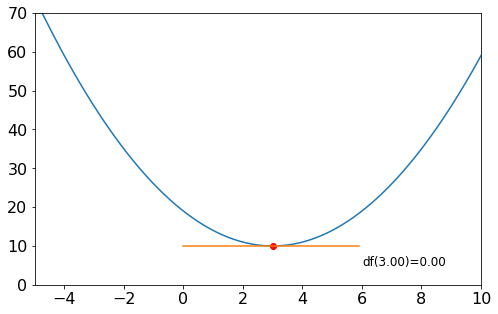

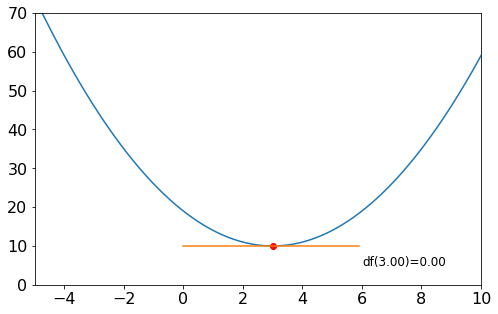

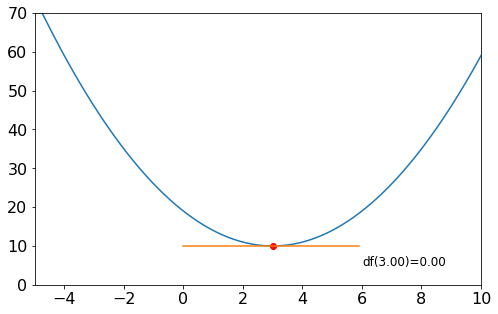

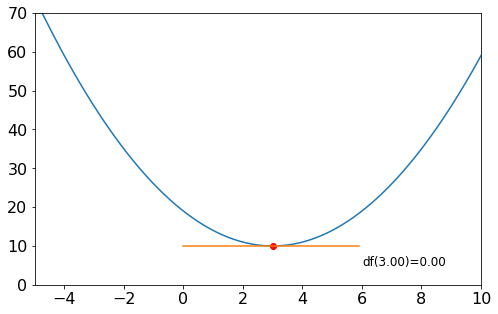

In [8]:
x_t = 8
alpha = .2
pltTan(x_t)
for i in range(30):
    x_t = x_t - alpha*df(x_t)
    pltTan(x_t)

In [10]:
X = np.array([
    [3,4,6,10],
    [5,6,6,8],
    [6,6,3,2],
    [5,5,7,3]    
])

y = np.array([1,2,3,4])

def f2(x,theta):
    return np.dot(x,theta)

def gradf2(y_hat,x,y_target):
    grad = np.array([(y_hat-y_target)*x[0], (y_hat-y_target)*x[1], (y_hat-y_target)*x[2], (y_hat-y_target)*x[3]])
    return(grad)

def J(y_hat,y_target):
    return .5*(y_hat-y_target)**2

# Set initial theta
theta = np.random.rand(4)
alpha = .0001

y_hat = np.zeros(len(y))
for i in range(X.shape[0]):
    y_hat[i] = f2(X[i], theta)
    
# Calculate initial value of objective function
J_total = 0
for i in range(X.shape[0]):
    J_total += J(y_hat[i],y[i])
print("J total", J_total)

for i in range(X.shape[0]):
    theta = theta - alpha*gradf2(y_hat[i],X[i],y[i])

J total 73.5070727781


In [11]:
for e in range(1000000):
    for i in range(X.shape[0]):
        y_hat[i] = f2(X[i], theta)
        theta = theta - alpha*gradf2(y_hat[i],X[i],y[i])

    if e % 100000 == 0:
        J_total = 0
        for i in range(X.shape[0]):
            J_total += J(y_hat[i],y[i])
        print("J total", J_total)
        

J total 65.0701098389
J total 0.011513444019
J total 0.00645570100995
J total 0.0036197748876
J total 0.00202964328997
J total 0.00113804090376
J total 0.000638110699079
J total 0.000357794928928
J total 0.000200619126667
J total 0.000112489112424


In [12]:
theta

array([ 1.23519535, -0.87548709,  0.37764549, -0.14754756])

In [13]:
for i in range(X.shape[0]):
    y_hat[i] = f2(X[i], theta)
    print(y[i], y_hat[i])

1 0.994035010543
2 2.00854666862
3 2.99609093399
4 3.99941706566
